#### Andrew Taylor
#### atayl136
#### EN705.601.83 Applied Machine Lerning
## Homework 6

### Heart Failure Data Set  

#### Initial Data Exploration Summary  
Here's what I observed:  

##### Data Types and Features:  

Numerical: Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease  
Nominal (Categorical): Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope 

##### Statistical Summary:    

Age ranges from 28 to 77 with a mean of approximately 53.5.  
RestingBP has some zero values, which may need to be looked into.  
Cholesterol also has some zero values.  
FastingBS is binary (0 or 1).  
MaxHR ranges from 60 to 202.  
Oldpeak ranges from -2.6 to 6.2.  
HeartDisease (target variable) is binary (0 or 1).  



In [1]:
# Data Exporation and Preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Load the data set
df = pd.read_csv('heart_dataset.csv')

# Identify nominal (categorical) columns that need to be one-hot encoded
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Initialize StandardScaler for selected numerical columns
scaler = StandardScaler()

# Columns to be scaled (0-indexed)
columns_to_scale = [0, 3, 4, 7]

# Initialize one-hot encoder and column transformer
onehot_encoder = OneHotEncoder(sparse=False)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', onehot_encoder, categorical_columns),
        ('num', scaler, columns_to_scale)
    ],
    remainder='passthrough'  # Columns not specified will be passed through without any transformation
)

# Apply the transformations to the dataframe
df_transformed = pd.DataFrame(preprocessor.fit_transform(df))

# Display the first few rows of the transformed dataframe
print("Transformed Dataframe - First Few Rows:")
print(df_transformed.head())
print('\n')

# Sanity Checks
print("Sanity Checks:")
# Check if the number of rows remains the same after transformation
row_check = df.shape[0] == df_transformed.shape[0]
# Check if all columns are numerical now
all_numerical = df_transformed.dtypes.all() == 'float64' or df_transformed.dtypes.all() == 'int64'
print(f"Row Count Matches: {row_check}, All Columns Numerical?: {all_numerical}")
print('\n')

# Check the data types of the transformed dataframe
print("Data Types of Transformed Dataframe:")
print(df_transformed.dtypes)
print('\n')



Transformed Dataframe - First Few Rows:
    0    1    2    3    4    5    6    7    8    9   ...   11   12   13  \
0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  0.0  1.0   
1  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  1.0  0.0   
2  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  ...  0.0  0.0  1.0   
3  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  0.0   
4  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  0.0  1.0   

         14        15        16        17   18   19   20  
0 -1.433140  0.410909  0.825070  1.382928  0.0  0.0  0.0  
1 -0.478484  1.491752 -0.171961  0.754157  0.0  1.0  1.0  
2 -1.751359 -0.129513  0.770188 -1.525138  0.0  0.0  0.0  
3 -0.584556  0.302825  0.139040 -1.132156  0.0  1.5  1.0  
4  0.051881  0.951331 -0.034755 -0.581981  0.0  0.0  0.0  

[5 rows x 21 columns]


Sanity Checks:
Row Count Matches: True, All Columns Numerical?: False


Data Types of Transformed Dataframe:
0     float64
1     f

In [2]:
%%time

''' Question 1: Report 10-fold CV performances of GaussianNB, linear SVC (use
SVC(kernel='linear', probability=True)), MLPClassifier, and DecisionTreeClassifier
with default parameters. Now report the RandomForestClassifier performance too.'''

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Separate features and target variable from the transformed dataframe
X = df_transformed.iloc[:, :-1].values
y = df_transformed.iloc[:, -1].values

# Perform 10-fold cross-validation for GaussianNB 
gaussianNB_scores = cross_val_score(GaussianNB(), X, y, cv=10, scoring='accuracy')
gaussianNB_scores, np.mean(gaussianNB_scores), np.std(gaussianNB_scores)


Wall time: 601 ms


(array([0.81521739, 0.92391304, 0.88043478, 0.92391304, 0.86956522,
        0.83695652, 0.88043478, 0.75      , 0.81318681, 0.82417582]),
 0.8517797419971334,
 0.051509233993797914)

In [3]:
%%time
# Perform 10-fold cross-validation for LinearSVC
linearSVC_scores = cross_val_score(SVC(kernel='linear', probability=True), X, y, cv=10, scoring='accuracy')
linearSVC_scores, np.mean(linearSVC_scores), np.std(linearSVC_scores)


Wall time: 2.29 s


(array([0.82608696, 0.91304348, 0.84782609, 0.95652174, 0.88043478,
        0.85869565, 0.86956522, 0.81521739, 0.74725275, 0.75824176]),
 0.8472885809842332,
 0.06115185484530146)

In [4]:
%%time

import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Perform 10-fold cross-validation for MLPClassifier 
mlp_scores = cross_val_score(MLPClassifier(), X, y, cv=10, scoring='accuracy')
mlp_scores, np.mean(mlp_scores), np.std(mlp_scores)


Wall time: 21.3 s


(array([0.85869565, 0.94565217, 0.93478261, 0.89130435, 0.83695652,
        0.82608696, 0.85869565, 0.7826087 , 0.82417582, 0.79120879]),
 0.8550167224080267,
 0.052297112846220004)

In [5]:
%%time
# Perform 10-fold cross-validation for DecisionTreeClassifier 
decision_tree_scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy')
decision_tree_scores, np.mean(decision_tree_scores), np.std(decision_tree_scores)


Wall time: 145 ms


(array([0.7826087 , 0.84782609, 0.7826087 , 0.83695652, 0.83695652,
        0.7826087 , 0.83695652, 0.76086957, 0.64835165, 0.71428571]),
 0.7830028666985189,
 0.06023154268841079)

In [6]:
%%time
# Perform 10-fold cross-validation for RandomForestClassifier 
random_forest_scores = cross_val_score(RandomForestClassifier(), X, y, cv=10, scoring='accuracy')
random_forest_scores, np.mean(random_forest_scores), np.std(random_forest_scores)


Wall time: 5.1 s


(array([0.90217391, 0.93478261, 0.7826087 , 0.90217391, 0.86956522,
        0.84782609, 0.91304348, 0.80434783, 0.81318681, 0.79120879]),
 0.856091734352604,
 0.0529722214820471)

In [7]:
# Question 2: Ensembles

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Initialize the ensembles as lists
ensemble_gaussianNB = [GaussianNB() for _ in range(100)]
ensemble_linearSVC = [SVC(kernel='linear', probability=True) for _ in range(100)]
ensemble_mlp = [MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=30, tol=1e-1, early_stopping=True) for _ in range(100)]
ensemble_decision_tree = [DecisionTreeClassifier(max_depth=5, max_features=5) for _ in range(100)]




In [18]:
# Question 3: ensemble_fit()

from sklearn.utils import resample

def ensemble_fit(ensemble, X_train, y_train, subsample_ratio, min_samples=10):
    """
    Fit an ensemble of classifiers on a subset of the training data.

    Parameters:
        ensemble (list): List of sklearn classifier objects
        X_train (np.ndarray): Training features
        y_train (np.ndarray): Training labels
        subsample_ratio (float): Fraction of training data to use for each classifier
        min_samples (int): Minimum number of samples to use for training

    Returns:
        list: List of trained sklearn classifier objects
    """
    n_samples = X_train.shape[0]
    
    # Ensure that the number of subsamples is at least min_samples
    n_subsamples = max(int(n_samples * subsample_ratio), min_samples)
    
    trained_ensemble = []
    for clf in ensemble:
        # Subsample the training data
        indices = np.random.choice(range(n_samples), n_subsamples, replace=False)
        X_subsample, y_subsample = X_train[indices], y_train[indices]
        
        # Train the classifier on the subsample
        clf.fit(X_subsample, y_subsample)
        trained_ensemble.append(clf)
        
    return trained_ensemble


In [19]:
# Question 4: ensemble_predict()

def decision_function_to_prob(decision_function_output):
    return 1 / (1 + np.exp(-decision_function_output))

def ensemble_predict(trained_ensemble, X_test):
    """
    Makes predictions using an ensemble of classifiers through majority voting based on class probabilities.
    
    Parameters:
        trained_ensemble (list): List of trained sklearn classifier objects
        X_test (np.ndarray): Test features
    
    Returns:
        np.ndarray: Ensemble predictions based on class probabilities
    """
    ensemble_probabilities = []
    # Collect class probabilities from each classifier in the ensemble
    for clf in trained_ensemble:
        if hasattr(clf, "predict_proba"):
            proba = clf.predict_proba(X_test)
        elif hasattr(clf, "decision_function"):  # For models like LinearSVC
            decision_function_output = clf.decision_function(X_test)
            proba = decision_function_to_prob(decision_function_output)
            # Reshape to match the (n_samples, n_classes) shape
            proba = np.vstack([1 - proba, proba]).T
        else:
            raise RuntimeError("The classifier does not have predict_proba or decision_function method.")
        
        ensemble_probabilities.append(proba)


     # Sum up the class probabilities across all classifiers
    summed_probabilities = np.sum(ensemble_probabilities, axis=0)
    
    # Final prediction is the class with the highest summed probability for each test instance
    final_predictions = np.argmax(summed_probabilities, axis=1)
    return final_predictions


In [21]:
%%time

# Question 5: 10-fold CV using these functions

from sklearn.model_selection import KFold
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# evaluate_ensemble_with_subsample function to return fold accuracies along with mean and std
def evaluate_ensemble_with_subsample(ensemble, X, y, subsample_ratio, n_splits=10):
    """
    Evaluate ensemble performance using 10-fold CV with a given subsample ratio.
    
    Parameters:
        ensemble (list): List of sklearn classifier objects
        X (np.ndarray): Features
        y (np.ndarray): Labels
        subsample_ratio (float): Fraction of training data to use for each classifier
        n_splits (int): Number of folds for CV
    
    Returns:
        tuple: Mean accuracy, Standard Deviation, Fold Accuracies
    """
    kf = KFold(n_splits=n_splits)
    fold_accuracies = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Fit the ensemble using a subset of the training data
        trained_ensemble = ensemble_fit(ensemble, X_train, y_train, subsample_ratio)
        
        # Make predictions on the test data
        y_pred = ensemble_predict(trained_ensemble, X_test)
        
        # Calculate accuracy for this fold
        fold_accuracies.append(np.mean(y_pred == y_test))
    
    return np.mean(fold_accuracies), np.std(fold_accuracies), fold_accuracies

# evaluate ensembles with subsample ratios of 0.2 and 0.05
ensemble_cv_performance_detailed = {}

for name, ensemble in zip(['GaussianNB', 'MLPClassifier', 'DecisionTreeClassifier', 'LinearSVC'],
                          [ensemble_gaussianNB, ensemble_mlp, ensemble_decision_tree, ensemble_linearSVC]):
    for subsample_ratio in [0.2, 0.05]:
        mean_accuracy, std_deviation, fold_accuracies = evaluate_ensemble_with_subsample(ensemble, X, y, subsample_ratio)
        ensemble_cv_performance_detailed[f"{name}_subsample_{subsample_ratio}"] = {
            'Mean Accuracy': mean_accuracy,
            'Standard Deviation': std_deviation,
            'Fold Accuracies': fold_accuracies
        }

# Pretty print the 10-fold CV performances of the ensembles with titles and fold accuracies
print("Updated 10-Fold CV Performances of the Ensembles:")
for name, metrics in ensemble_cv_performance_detailed.items():
    print(f"{name}:")
    print(f"  - Mean Accuracy: {metrics['Mean Accuracy']:.3f}")
    print(f"  - Standard Deviation: {metrics['Standard Deviation']:.3f}")
    print(f"  - Fold Accuracies: {metrics['Fold Accuracies']}")
    print()



Updated 10-Fold CV Performances of the Ensembles:
GaussianNB_subsample_0.2:
  - Mean Accuracy: 0.859
  - Standard Deviation: 0.050
  - Fold Accuracies: [0.8913043478260869, 0.8695652173913043, 0.9239130434782609, 0.8804347826086957, 0.8804347826086957, 0.9130434782608695, 0.8369565217391305, 0.75, 0.8021978021978022, 0.8461538461538461]

GaussianNB_subsample_0.05:
  - Mean Accuracy: 0.851
  - Standard Deviation: 0.056
  - Fold Accuracies: [0.8804347826086957, 0.8695652173913043, 0.9130434782608695, 0.8804347826086957, 0.8586956521739131, 0.9239130434782609, 0.8260869565217391, 0.7282608695652174, 0.7912087912087912, 0.8351648351648352]

MLPClassifier_subsample_0.2:
  - Mean Accuracy: 0.515
  - Standard Deviation: 0.201
  - Fold Accuracies: [0.6413043478260869, 0.5543478260869565, 0.391304347826087, 0.2391304347826087, 0.8586956521739131, 0.25, 0.31521739130434784, 0.6630434782608695, 0.7252747252747253, 0.5164835164835165]

MLPClassifier_subsample_0.05:
  - Mean Accuracy: 0.421
  - Sta

Updated 10-Fold CV Performances of the Ensembles:
GaussianNB_subsample_0.03:
  - Mean Accuracy: 0.853
  - Standard Deviation: 0.054
  - Fold Accuracies: [0.9130434782608695, 0.9021739130434783, 0.9130434782608695, 0.8913043478260869, 0.8586956521739131, 0.8804347826086957, 0.8152173913043478, 0.75, 0.7912087912087912, 0.8131868131868132]

GaussianNB_subsample_0.05:
  - Mean Accuracy: 0.863
  - Standard Deviation: 0.062
  - Fold Accuracies: [0.9021739130434783, 0.8804347826086957, 0.9239130434782609, 0.9130434782608695, 0.9021739130434783, 0.9239130434782609, 0.8152173913043478, 0.7391304347826086, 0.7802197802197802, 0.8461538461538461]

GaussianNB_subsample_0.1:
  - Mean Accuracy: 0.858
  - Standard Deviation: 0.051
  - Fold Accuracies: [0.8804347826086957, 0.8804347826086957, 0.9239130434782609, 0.8804347826086957, 0.8804347826086957, 0.9130434782608695, 0.8369565217391305, 0.7391304347826086, 0.8131868131868132, 0.8351648351648352]

GaussianNB_subsample_0.2:
  - Mean Accuracy: 0.860

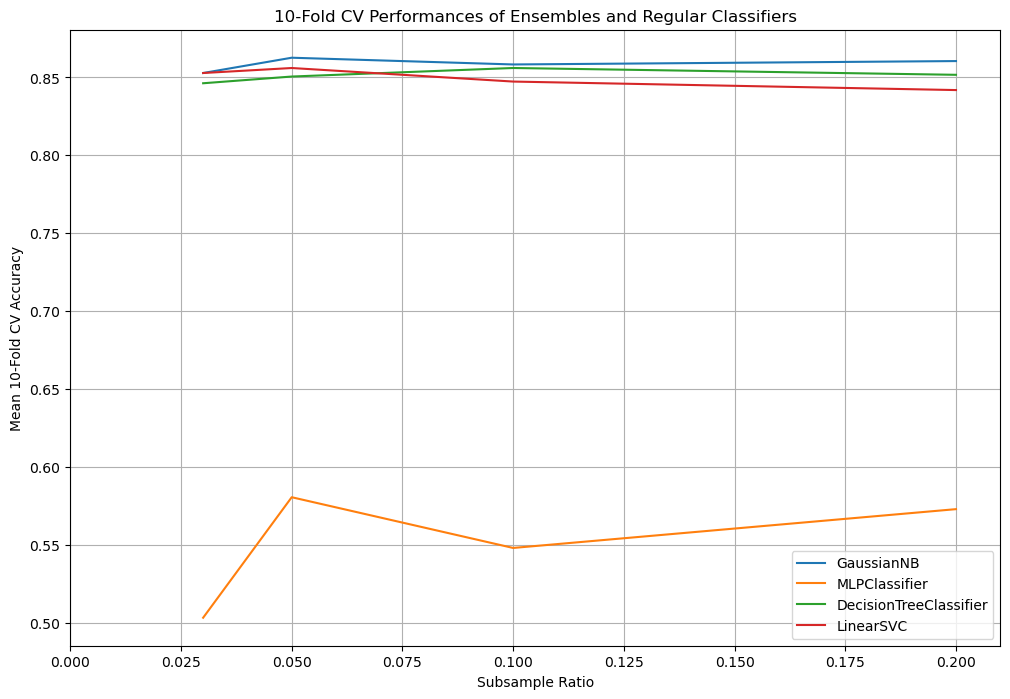

Wall time: 2min 49s


In [24]:
%%time

# Question 6: Report and Plot 10-fold CV performance and regular classifier performance
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import warnings

import matplotlib.pyplot as plt

# Specify the subsample_ratios used for 10-fold CV evaluation (0.005 and 0.01 resulted in errors, why?)
subsample_ratios = [0.03, 0.05, 0.1, 0.2]

# evaluate ensembles with subsample ratios 
ensemble_cv_performance_detailed = {}

for name, ensemble in zip(['GaussianNB', 'MLPClassifier', 'DecisionTreeClassifier', 'LinearSVC'],
                          [ensemble_gaussianNB, ensemble_mlp, ensemble_decision_tree, ensemble_linearSVC]):
    for subsample_ratio in [0.03, 0.05, 0.1, 0.2]:
        mean_accuracy, std_deviation, fold_accuracies = evaluate_ensemble_with_subsample(ensemble, X, y, subsample_ratio)
        ensemble_cv_performance_detailed[f"{name}_subsample_{subsample_ratio}"] = {
            'Mean Accuracy': mean_accuracy,
            'Standard Deviation': std_deviation,
            'Fold Accuracies': fold_accuracies
        }

# Pretty print the 10-fold CV performances of the ensembles with titles and fold accuracies
print("Updated 10-Fold CV Performances of the Ensembles:")
for name, metrics in ensemble_cv_performance_detailed.items():
    print(f"{name}:")
    print(f"  - Mean Accuracy: {metrics['Mean Accuracy']:.3f}")
    print(f"  - Standard Deviation: {metrics['Standard Deviation']:.3f}")
    print(f"  - Fold Accuracies: {metrics['Fold Accuracies']}")
    print()
        
        
# Initialize a dictionary to hold the mean accuracies for plotting
plot_data = {}

# Extract mean accuracies from the ensemble_cv_performance_detailed dictionary
for name in ['GaussianNB', 'MLPClassifier', 'DecisionTreeClassifier', 'LinearSVC']:
    mean_accuracies = []
    for subsample_ratio in subsample_ratios:
        key = f"{name}_subsample_{subsample_ratio}"
        if key in ensemble_cv_performance_detailed:
            mean_accuracy = ensemble_cv_performance_detailed[key]['Mean Accuracy']
            mean_accuracies.append(mean_accuracy)
    if mean_accuracies:  # Only add to plot_data if mean_accuracies is not empty
        plot_data[name] = mean_accuracies

# Generate the plot
plt.figure(figsize=(12, 8))
for name, mean_accuracies in plot_data.items():
    plt.plot(subsample_ratios, mean_accuracies, label=name)

plt.xlabel('Subsample Ratio')
plt.ylabel('Mean 10-Fold CV Accuracy')
plt.title('10-Fold CV Performances of Ensembles and Regular Classifiers')
plt.xlim([0, 0.21])  # Setting the x-axis range from 0 to 0.21
plt.legend()
plt.grid(True)
plt.show()




##### I could not get results for subsample sizes 0.005 and 0.01 with a dataset of 919 data points and 10 fold cross validation because this results in a sample size smaller than 1 point. So I plotted results for the remaining subsample ratios. Was there a typo in the instructions? Am I supposed to sample before CV?

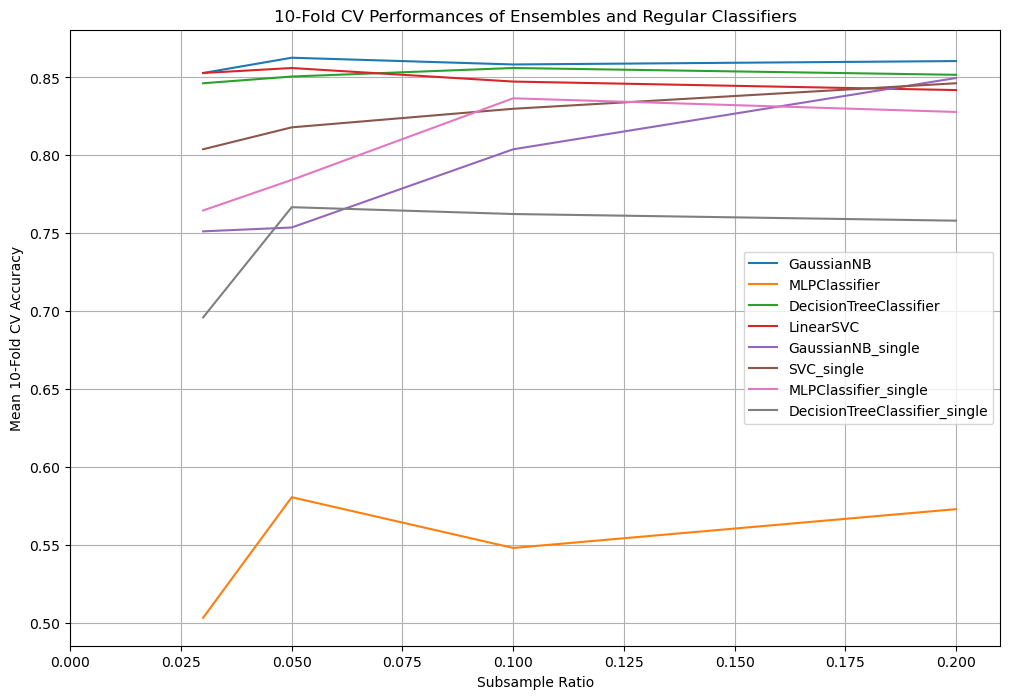

In [25]:
def evaluate_single_classifier(clf, X, y, subsample_ratio, n_splits=10):
    kf = KFold(n_splits=n_splits)
    fold_accuracies = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Use a subset of the training data to fit the classifier
        subset_indices = np.random.choice(len(X_train), int(len(X_train) * subsample_ratio), replace=False)
        X_train_subset = X_train[subset_indices]
        y_train_subset = y_train[subset_indices]
        
        # Fit the classifier
        clf.fit(X_train_subset, y_train_subset)
        
        # Make predictions on the test data
        y_pred = clf.predict(X_test)
        
        # Calculate accuracy for this fold
        fold_accuracies.append(np.mean(y_pred == y_test))
    
    return np.mean(fold_accuracies), np.std(fold_accuracies), fold_accuracies


# Add individual classifiers to the ensemble_cv_performance_detailed dictionary
for name, clf in zip(['GaussianNB_single', 'SVC_single', 'MLPClassifier_single', 'DecisionTreeClassifier_single'],
                     [GaussianNB(), SVC(probability=True), MLPClassifier(), DecisionTreeClassifier()]):
    for subsample_ratio in subsample_ratios:
        mean_accuracy, std_deviation, fold_accuracies = evaluate_single_classifier(clf, X, y, subsample_ratio)
        ensemble_cv_performance_detailed[f"{name}_subsample_{subsample_ratio}"] = {
            'Mean Accuracy': mean_accuracy,
            'Standard Deviation': std_deviation,
            'Fold Accuracies': fold_accuracies
        }

        
        # Update plot_data to include individual classifiers
for name in ['GaussianNB', 'MLPClassifier', 'DecisionTreeClassifier', 'LinearSVC', 
             'GaussianNB_single', 'SVC_single', 'MLPClassifier_single', 'DecisionTreeClassifier_single']:
    mean_accuracies = []
    for subsample_ratio in subsample_ratios:
        key = f"{name}_subsample_{subsample_ratio}"
        if key in ensemble_cv_performance_detailed:
            mean_accuracy = ensemble_cv_performance_detailed[key]['Mean Accuracy']
            mean_accuracies.append(mean_accuracy)
    if mean_accuracies:  # Only add to plot_data if mean_accuracies is not empty
        plot_data[name] = mean_accuracies

# Generate the plot
plt.figure(figsize=(12, 8))
for name, mean_accuracies in plot_data.items():
    plt.plot(subsample_ratios, mean_accuracies, label=name)

plt.xlabel('Subsample Ratio')
plt.ylabel('Mean 10-Fold CV Accuracy')
plt.title('10-Fold CV Performances of Ensembles and Regular Classifiers')
plt.xlim([0, 0.21])  # Setting the x-axis range from 0 to 0.21
plt.legend()
plt.grid(True)
plt.show()


Let's analyze the reported performances in detail:

### GaussianNB Ensembles:
- The mean accuracy of Gaussian Naive Bayes ensembles is quite stable across different subsampling ratios, ranging from around 85.2% to 86.2%. 
- The standard deviation is also consistently low, which suggests that the model is stable across different folds.
  
### MLPClassifier Ensembles:
- The MLPClassifier ensembles show poor performance, with mean accuracy as low as 50.3% for a 0.03 subsample ratio.
- The standard deviation is high, indicating that the model is very unstable across different folds.
  
### DecisionTreeClassifier Ensembles:
- Decision Trees show good performance, comparable to GaussianNB, with mean accuracy ranging from 84.6% to 85.6%.
- The standard deviation is relatively low, suggesting a stable model.
  
### LinearSVC Ensembles:
- The mean accuracy is quite stable across different subsample ratios, ranging from around 84.1% to 85.6%.
- The standard deviation is also low, indicating good stability across folds.

### Individual Classifiers:
#### GaussianNB:
- Mean accuracy ranges from around 75.1% to 85.0%, which is lower compared to its ensemble counterpart.
  
#### SVC:
- Mean accuracy ranges from 80.3% to 84.6%. It performs quite well but is still not as stable as some ensemble models.
  
#### MLPClassifier:
- Mean accuracy ranges from 76.4% to 83.7%, showing significant improvement over its ensemble versions.
  
#### DecisionTreeClassifier:
- The performance of individual Decision Trees is not as stable as their ensemble counterparts, with mean accuracy ranging from 69.6% to 76.7%.

### Observations:
- Ensemble models for GaussianNB and Decision Trees outperform their individual counterparts in terms of stability and accuracy.
- Individual MLPClassifiers are far better than their ensemble versions, which is interesting and warrants further investigation.
- SVC as an individual classifier performs quite well but doesn't show a significant advantage over its ensemble counterparts.
  
The ensemble models generally outperform or match the individual classifiers, except for the MLPClassifier. This could be due to the nature of the data or perhaps the ensemble strategy used for MLPClassifier needs further tuning. I'm also thinking it could benefit from more hidden layers.